### 1st part - Ecommerce's current year performance

In [12]:
# Import libraries and connection with public Google Drive file
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Read the dataset
file_path = '/content/drive/MyDrive/Github_Datasets/Bakery_Fest/bf22-acquisition-channels.csv'
df = pd.read_csv(file_path)
display(df)

,Default Channel Grouping,Landing Page,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,Organic Search,/,"116,234","109,670","147,299",35.51%,4.25,0:03:24,4.61%,"6,788","€205,441.44"
1,Direct,/fr/42457-bakery-fest-deluxe-de-paris/,"64,806","63,698","66,863",89.11%,1.52,0:00:21,0.94%,523,"€17,150.80"
2,Paid Search,/fr/42457-bakery-fest-deluxe-de-paris/,"57,305","52,298","75,115",43.63%,3.62,0:01:50,4.00%,"2,504","€72,590.90"
3,Direct,/,"20,590","20,245","24,022",44.16%,3.41,0:02:33,3.16%,633,"€18,439.00"
4,Organic Search,/infos-pratiques/,"19,651","14,015","23,318",55.43%,3.31,0:02:33,5.55%,"1,079","€33,495.20"
...,...,...,...,...,...,...,...,...,...,...,...
4995,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,0,1,100.00%,1.00,0:00:00,0.00%,0,€0.00
4996,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,1,1,100.00%,1.00,0:00:00,0.00%,0,€0.00
4997,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,1,1,100.00%,1.00,0:00:00,0.00%,0,€0.00
4998,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,1,1,100.00%,1.00,0:00:00,0.00%,0,€0.00


In [14]:
# The event happens in different cities and the client only wanted to check the Paris one. Gladly, they're differentiated by a code.
filtered_df = df[df["Landing Page"].astype(str).str.contains("42457")]

In [15]:
# Verify that the correct Landing Pages were being extracted
filtered_df.head()

,Default Channel Grouping,Landing Page,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
1,Direct,/fr/42457-bakery-fest-deluxe-de-paris/,"64,806","63,698","66,863",89.11%,1.52,0:00:21,0.94%,523,"€17,150.80"
2,Paid Search,/fr/42457-bakery-fest-deluxe-de-paris/,"57,305","52,298","75,115",43.63%,3.62,0:01:50,4.00%,"2,504","€72,590.90"
8,Paid Search,/fr/42457-bakery-fest-deluxe-de-paris/cms/FAQ-...,"6,760","2,662","8,124",87.65%,1.28,0:00:38,0.24%,16,€442.00
10,Direct,/fr/42457-bakery-fest-deluxe-de-paris/authenti...,"5,662","5,263","6,662",13.42%,7.11,0:02:34,2.29%,127,"€3,709.20"
11,Email,/fr/42457-bakery-fest-deluxe-de-paris/,"5,177","4,507","7,078",45.24%,3.60,0:02:02,4.59%,271,"€7,765.80"


In [16]:
#Here I cleaned the dataset to eliminate values like ',' or '€' that would not allow to analyze the numbers.

clean_df = filtered_df.applymap(lambda x: x.replace(',', '').replace('€', '') if isinstance(x, str) else x)
clean_df

,Default Channel Grouping,Landing Page,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
1,Direct,/fr/42457-bakery-fest-deluxe-de-paris/,64806,63698,66863,89.11%,1.52,0:00:21,0.94%,523,17150.80
2,Paid Search,/fr/42457-bakery-fest-deluxe-de-paris/,57305,52298,75115,43.63%,3.62,0:01:50,4.00%,2504,72590.90
8,Paid Search,/fr/42457-bakery-fest-deluxe-de-paris/cms/FAQ-...,6760,2662,8124,87.65%,1.28,0:00:38,0.24%,16,442.00
10,Direct,/fr/42457-bakery-fest-deluxe-de-paris/authenti...,5662,5263,6662,13.42%,7.11,0:02:34,2.29%,127,3709.20
11,Email,/fr/42457-bakery-fest-deluxe-de-paris/,5177,4507,7078,45.24%,3.60,0:02:02,4.59%,271,7765.80
...,...,...,...,...,...,...,...,...,...,...,...
4995,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,0,1,100.00%,1.00,0:00:00,0.00%,0,0.00
4996,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,1,1,100.00%,1.00,0:00:00,0.00%,0,0.00
4997,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,1,1,100.00%,1.00,0:00:00,0.00%,0,0.00
4998,(Other),/fr/42457-bakery-fest-deluxe-de-paris/?fbclid=...,1,1,1,100.00%,1.00,0:00:00,0.00%,0,0.00


In [17]:
# After this I verified each column type

clean_df.dtypes

Default Channel Grouping      object
Landing Page                  object
Users                         object
New Users                     object
Sessions                      object
Bounce Rate                   object
Pages / Session              float64
Avg. Session Duration         object
Ecommerce Conversion Rate     object
Transactions                  object
Revenue                       object
dtype: object

In [18]:
# I realized I needed to transform some columns to integers and floats. I updated their type with the following code

clean_df['Sessions'] = clean_df['Sessions'].str.replace(',', '').astype(int)
clean_df['Revenue'] = clean_df['Revenue'].str.replace(',', '').str.replace('€', '').astype(float)
clean_df.dtypes

Default Channel Grouping      object
Landing Page                  object
Users                         object
New Users                     object
Sessions                       int64
Bounce Rate                   object
Pages / Session              float64
Avg. Session Duration         object
Ecommerce Conversion Rate     object
Transactions                  object
Revenue                      float64
dtype: object

In [19]:
# Then, as she wanted to know the performance of each channel. I run this code to group them

grouped_df = clean_df.groupby('Default Channel Grouping')

In [20]:
#And I kept the columns I needed: Sessions and Revenue

selected_df = grouped_df[["Sessions", "Revenue"]]
selected_df

In [21]:
# Then, I added the total sum at the end of the table

sum_df = selected_df.sum()
sum_df["Default Channel Grouping"] = sum_df.index
sum_df = sum_df[["Default Channel Grouping", "Sessions", "Revenue"]]
total_df = pd.DataFrame([["Total", sum_df["Sessions"].sum(), sum_df["Revenue"].sum()]], columns=sum_df.columns)
sum_df = sum_df.append(total_df, ignore_index=True)
print(sum_df)

  Default Channel Grouping  Sessions   Revenue
0                  (Other)      7174    1356.4
1                   Direct     88065   41588.6
2                  Display      8382     878.4
3                    Email      9365   14304.4
4           Organic Search     19958   42420.8
5              Paid Search     98183   93024.9
6                 Referral      6677   49669.2
7                   Social     12177    4069.4
8                    Total    249981  247312.1


<ipython-input-21-352fbfc28db4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_df = sum_df.append(total_df, ignore_index=True)


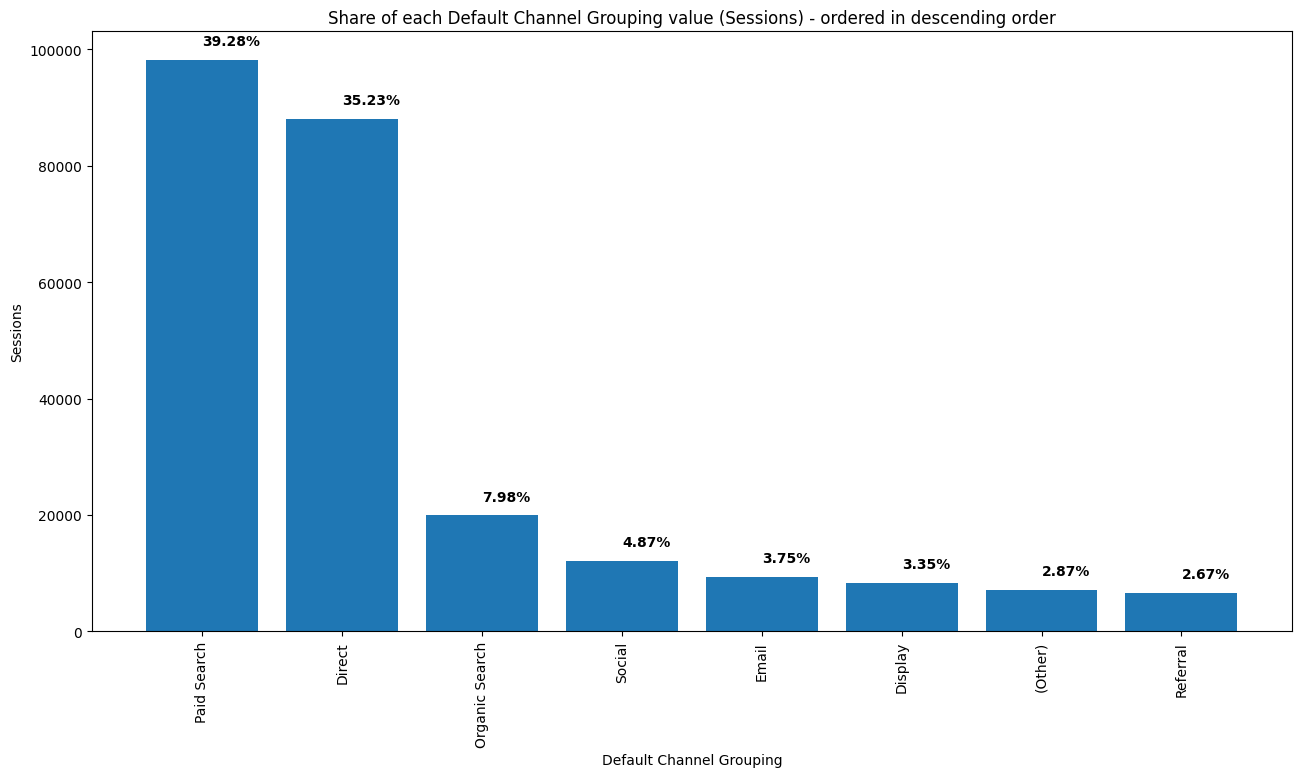

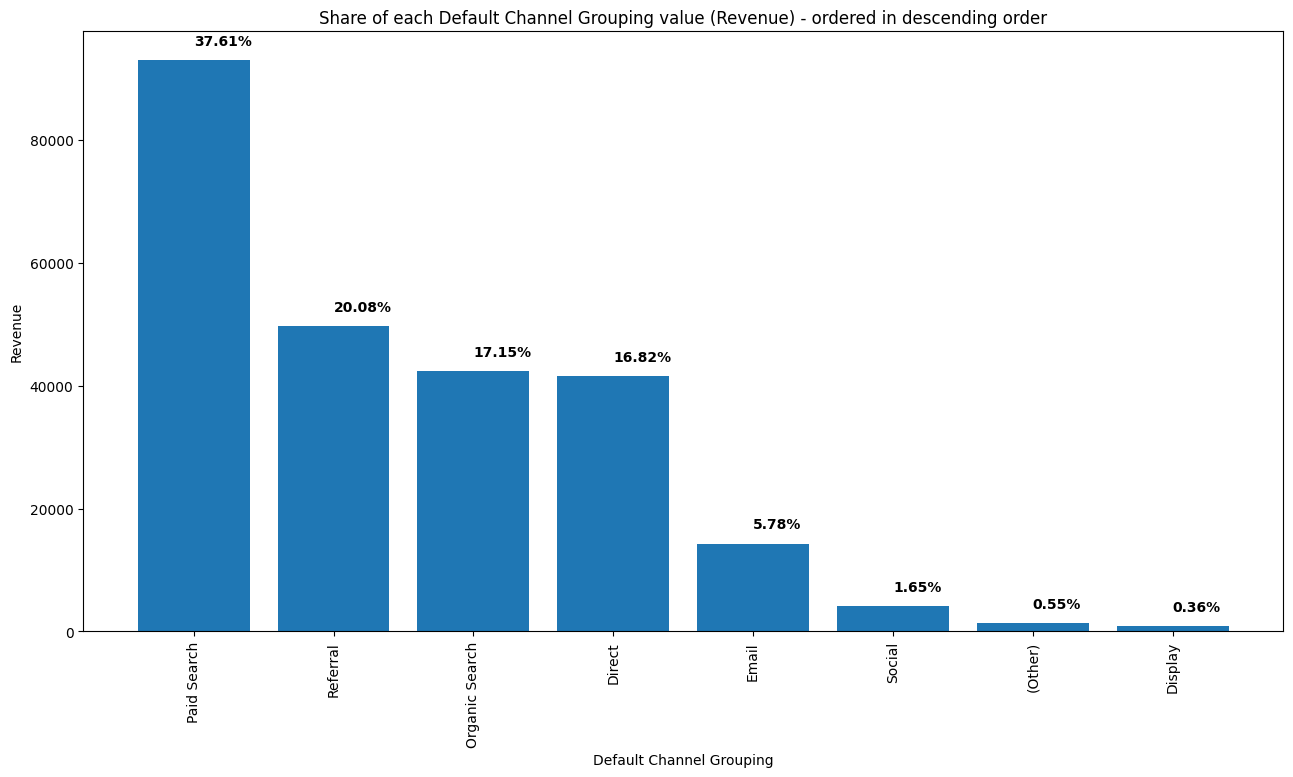

In [22]:
# Finally, I created a graph. This way she could easily visualize which Channel generated more traffic and revenue. So she could focus more on it for the last month of the event

import matplotlib.pyplot as plt

def plot_bar_chart(df, column_name):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_axes([0,0,1,1])
    df = df[df['Default Channel Grouping'] != 'Total'].sort_values(by=column_name, ascending=False)
    total = df[column_name].sum()
    ax.bar(df['Default Channel Grouping'], df[column_name])
    for i, v in enumerate(df[column_name]):
        ax.text(i, v + (total * 0.01), f"{v/total*100:.2f}%", color='black', fontweight='bold')
    plt.title(f'Share of each Default Channel Grouping value ({column_name}) - ordered in descending order')
    plt.xlabel('Default Channel Grouping')
    plt.xticks(rotation=90)
    plt.ylabel(column_name)
    plt.show()

plot_bar_chart(sum_df, "Sessions")
plot_bar_chart(sum_df, "Revenue")

# We detected that Paid Search was having a great performance. So it was recommended to keep focus in this paid channel, compared to Social, Display and Email. 

### 2nd part - Previous year Ecommerce's performance

In [23]:
# I felt that only knowing which was the best channel wouldn't be enough for her. So I asked for the previous season data (same period) and did the same analysis

In [24]:
# Since this point until section '3rd part' I applied exactly the same process
file_path = '/content/drive/MyDrive/Github_Datasets/Bakery_Fest/bf21-acquisition-channels.csv'
df21 = pd.read_csv(file_path)
display(df21)

,Default Channel Grouping,Landing Page,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,Organic Search,/,"85,025","80,563","103,664",22.63%,4.79,0:03:22,2.90%,"3,010","€105,038.88"
1,Paid Search,/fr/42457-salon-du-chocolat-de-paris/,"62,498","58,048","75,002",10.23%,4.25,0:01:29,4.23%,"3,169","€94,760.71"
2,Direct,/fr/42457-salon-du-chocolat-de-paris/,"30,680","30,396","32,810",51.77%,3.11,0:01:20,4.41%,"1,447","€41,892.12"
3,Direct,/,"16,064","15,736","18,211",28.38%,4.22,0:02:59,2.50%,455,"€27,303.07"
4,(Other),/fr/42457-salon-du-chocolat-de-paris/?pgs=111,"14,426","13,510","21,929",60.61%,1.54,0:00:05,0.09%,19,€486.26
...,...,...,...,...,...,...,...,...,...,...,...
4995,Paid Search,/liste-des-exposants/page/28/?layout=list,1,0,1,0.00%,49.00,0:47:07,0.00%,0,€0.00
4996,Paid Search,/liste-des-exposants/page/3/?search_keyword=&d...,1,0,2,100.00%,1.00,0:00:00,0.00%,0,€0.00
4997,Paid Search,/liste-des-exposants/page/8/?layout=list,1,0,1,0.00%,2.00,0:01:08,0.00%,0,€0.00
4998,Paid Search,/opening-night/?lang=en,1,0,1,100.00%,1.00,0:00:00,0.00%,0,€0.00


In [25]:
filtered_df21 = df21[df21["Landing Page"].astype(str).str.contains("42457")]

In [26]:
filtered_df21.head()

,Default Channel Grouping,Landing Page,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
1,Paid Search,/fr/42457-salon-du-chocolat-de-paris/,"62,498","58,048","75,002",10.23%,4.25,0:01:29,4.23%,"3,169","€94,760.71"
2,Direct,/fr/42457-salon-du-chocolat-de-paris/,"30,680","30,396","32,810",51.77%,3.11,0:01:20,4.41%,"1,447","€41,892.12"
4,(Other),/fr/42457-salon-du-chocolat-de-paris/?pgs=111,"14,426","13,510","21,929",60.61%,1.54,0:00:05,0.09%,19,€486.26
8,Paid Search,/fr/42457-salon-du-chocolat-de-paris/cms/faq-6...,"10,422","5,441","12,491",22.18%,2.15,0:00:37,0.20%,25,€762.60
11,Social,/fr/42457-salon-du-chocolat-de-paris/products/...,"6,378",124,"7,680",61.75%,2.31,0:00:40,1.75%,134,"€3,566.62"


In [27]:
df21_2 = filtered_df21.applymap(lambda x: x.replace(',', '').replace('€', '') if isinstance(x, str) else x)
df21_2

,Default Channel Grouping,Landing Page,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
1,Paid Search,/fr/42457-salon-du-chocolat-de-paris/,62498,58048,75002,10.23%,4.25,0:01:29,4.23%,3169,94760.71
2,Direct,/fr/42457-salon-du-chocolat-de-paris/,30680,30396,32810,51.77%,3.11,0:01:20,4.41%,1447,41892.12
4,(Other),/fr/42457-salon-du-chocolat-de-paris/?pgs=111,14426,13510,21929,60.61%,1.54,0:00:05,0.09%,19,486.26
8,Paid Search,/fr/42457-salon-du-chocolat-de-paris/cms/faq-6...,10422,5441,12491,22.18%,2.15,0:00:37,0.20%,25,762.60
11,Social,/fr/42457-salon-du-chocolat-de-paris/products/...,6378,124,7680,61.75%,2.31,0:00:40,1.75%,134,3566.62
...,...,...,...,...,...,...,...,...,...,...,...
4960,Paid Search,/fr/42457-salon-du-chocolat-de-paris/products/...,1,1,1,0.00%,2.00,0:00:01,0.00%,0,0.00
4961,Paid Search,/fr/42457-salon-du-chocolat-de-paris/products/...,1,0,1,0.00%,10.00,0:09:06,100.00%,1,8.40
4962,Paid Search,/fr/42457-salon-du-chocolat-de-paris/products/...,1,1,1,0.00%,2.00,0:00:01,0.00%,0,0.00
4963,Paid Search,/fr/42457-salon-du-chocolat-de-paris/products/...,1,1,1,0.00%,2.00,0:00:03,0.00%,0,0.00


In [28]:
df21_2.dtypes

Default Channel Grouping      object
Landing Page                  object
Users                         object
New Users                     object
Sessions                      object
Bounce Rate                   object
Pages / Session              float64
Avg. Session Duration         object
Ecommerce Conversion Rate     object
Transactions                  object
Revenue                       object
dtype: object

In [29]:
df21_2['Sessions'] = df21['Sessions'].str.replace(',', '').astype(int)
df21_2['Revenue'] = df21['Revenue'].str.replace(',', '').str.replace('€', '').astype(float)
df21_2.dtypes

Default Channel Grouping      object
Landing Page                  object
Users                         object
New Users                     object
Sessions                       int64
Bounce Rate                   object
Pages / Session              float64
Avg. Session Duration         object
Ecommerce Conversion Rate     object
Transactions                  object
Revenue                      float64
dtype: object

In [30]:
grouped_df21 = df21_2.groupby('Default Channel Grouping')

In [31]:
selected_df21 = grouped_df21[["Sessions", "Revenue"]]
selected_df21

In [32]:
sum_df21 = selected_df21.sum()
sum_df21

,Sessions,Revenue
Default Channel Grouping,,
(Other),30274,930.71
Direct,49978,56581.13
Display,16320,806.18
Email,4004,12180.66
Organic Search,5166,16437.30
Paid Search,105229,116280.15
Referral,6882,13004.66
Social,16100,9879.19


In [33]:
sum_df21["Default Channel Grouping"] = sum_df21.index

In [34]:
sum_df21 = sum_df21[["Default Channel Grouping", "Sessions", "Revenue"]]

In [35]:
total_df21 = pd.DataFrame([["Total", sum_df21["Sessions"].sum(), sum_df21["Revenue"].sum()]], columns=sum_df21.columns)
sum_df21 = sum_df21.append(total_df21, ignore_index=True)

<ipython-input-35-ac3244f9a2dd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_df21 = sum_df21.append(total_df21, ignore_index=True)


In [36]:
df21 = sum_df21

In [37]:
print(df21)

  Default Channel Grouping  Sessions    Revenue
0                  (Other)     30274     930.71
1                   Direct     49978   56581.13
2                  Display     16320     806.18
3                    Email      4004   12180.66
4           Organic Search      5166   16437.30
5              Paid Search    105229  116280.15
6                 Referral      6882   13004.66
7                   Social     16100    9879.19
8                    Total    233953  226099.98


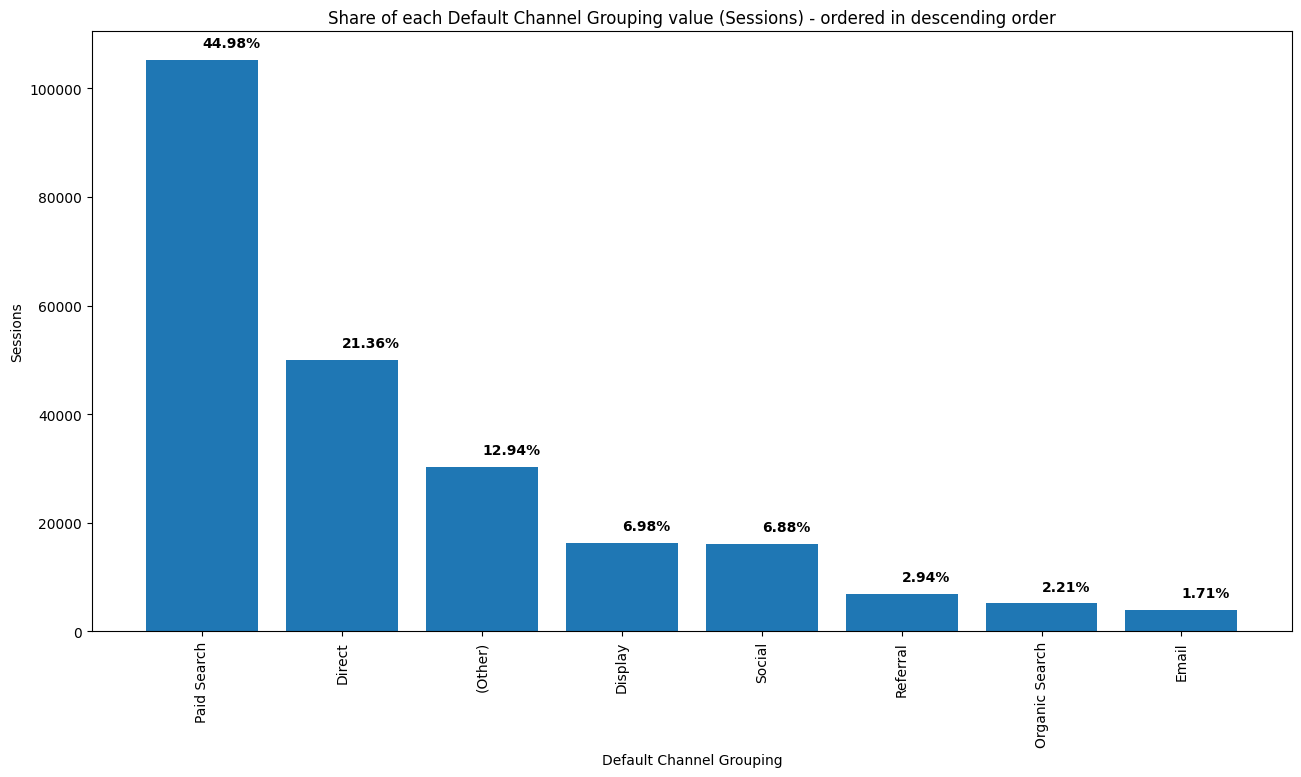

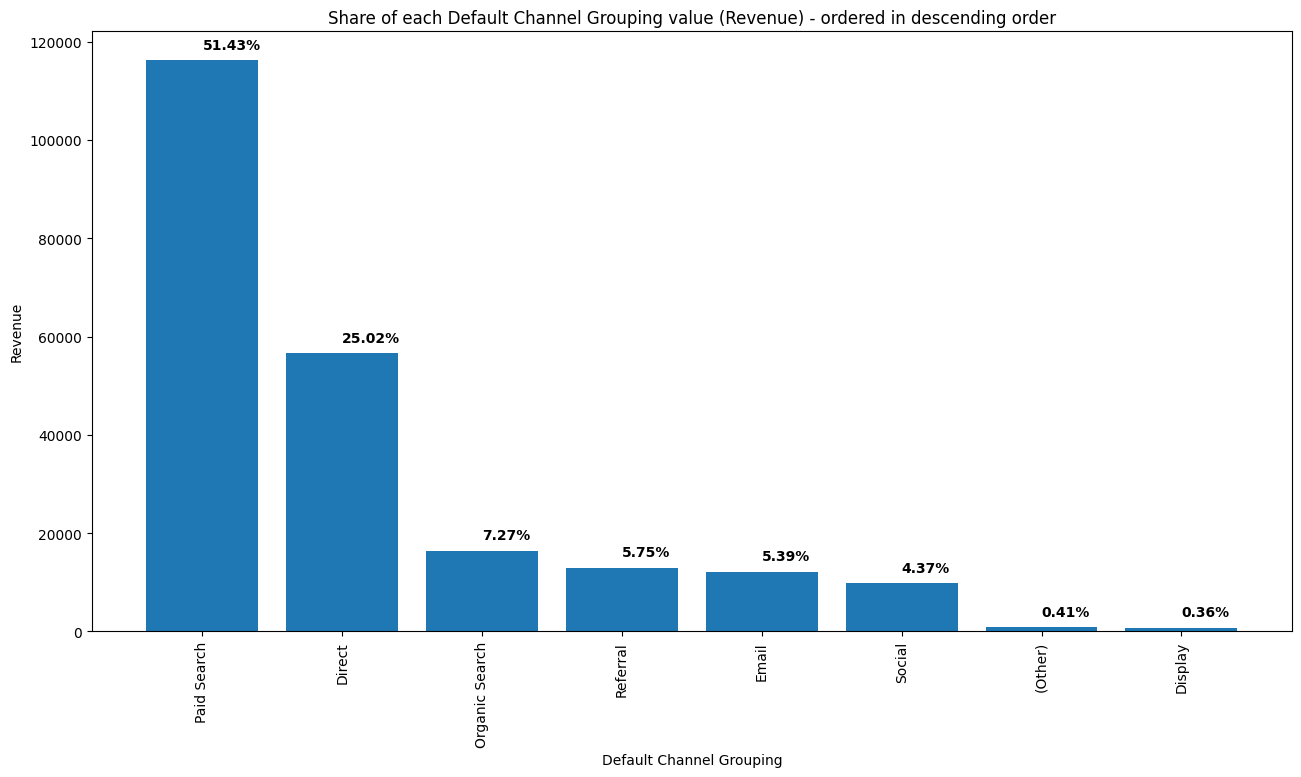

In [38]:
import matplotlib.pyplot as plt

def plot_bar_chart(df, column_name):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_axes([0,0,1,1])
    df = df[df['Default Channel Grouping'] != 'Total'].sort_values(by=column_name, ascending=False)
    total = df[column_name].sum()
    ax.bar(df['Default Channel Grouping'], df[column_name])
    for i, v in enumerate(df[column_name]):
        ax.text(i, v + (total * 0.01), f"{v/total*100:.2f}%", color='black', fontweight='bold')
    plt.title(f'Share of each Default Channel Grouping value ({column_name}) - ordered in descending order')
    plt.xlabel('Default Channel Grouping')
    plt.xticks(rotation=90)
    plt.ylabel(column_name)
    plt.show()

plot_bar_chart(df21, "Sessions")
plot_bar_chart(df21, "Revenue")

### 3rd part - Comparison between both years

In [39]:
# Then, I proceeded to compare both years performance

In [40]:
# First, I merged the both datasets in one table

merged_df = pd.merge(sum_df, df21, on='Default Channel Grouping', suffixes=('_22', '_21'))
merged_df

,Default Channel Grouping,Sessions_22,Revenue_22,Sessions_21,Revenue_21
0,(Other),7174,1356.4,30274,930.71
1,Direct,88065,41588.6,49978,56581.13
2,Display,8382,878.4,16320,806.18
3,Email,9365,14304.4,4004,12180.66
4,Organic Search,19958,42420.8,5166,16437.30
5,Paid Search,98183,93024.9,105229,116280.15
6,Referral,6677,49669.2,6882,13004.66
7,Social,12177,4069.4,16100,9879.19
8,Total,249981,247312.1,233953,226099.98


In [41]:
#And then created two columns with the porcentual variation between years

merged_df['Sessions_pct_change'] = (merged_df['Sessions_22'] - merged_df['Sessions_21']) / merged_df['Sessions_21'] * 100
merged_df['Revenue_pct_change'] = (merged_df['Revenue_22'] - merged_df['Revenue_21']) / merged_df['Revenue_21'] * 100
merged_df

,Default Channel Grouping,Sessions_22,Revenue_22,Sessions_21,Revenue_21,Sessions_pct_change,Revenue_pct_change
0,(Other),7174,1356.4,30274,930.71,-76.303098,45.738200
1,Direct,88065,41588.6,49978,56581.13,76.207531,-26.497403
2,Display,8382,878.4,16320,806.18,-48.639706,8.958297
3,Email,9365,14304.4,4004,12180.66,133.891109,17.435344
4,Organic Search,19958,42420.8,5166,16437.30,286.333720,158.076448
5,Paid Search,98183,93024.9,105229,116280.15,-6.695873,-19.999329
6,Referral,6677,49669.2,6882,13004.66,-2.978785,281.933861
7,Social,12177,4069.4,16100,9879.19,-24.366460,-58.808364
8,Total,249981,247312.1,233953,226099.98,6.850949,9.381743


In [42]:
# I used this code to clean it a bit. So this way is easier to read

comparison_df = merged_df[['Default Channel Grouping', 'Sessions_pct_change', 'Revenue_pct_change']]
comparison_df

,Default Channel Grouping,Sessions_pct_change,Revenue_pct_change
0,(Other),-76.303098,45.738200
1,Direct,76.207531,-26.497403
2,Display,-48.639706,8.958297
3,Email,133.891109,17.435344
4,Organic Search,286.333720,158.076448
5,Paid Search,-6.695873,-19.999329
6,Referral,-2.978785,281.933861
7,Social,-24.366460,-58.808364
8,Total,6.850949,9.381743


In [43]:
#Indeed, this year performance has improved vs last year. However, the Paid channel, which is this year's main traffic and revenue driver is slightly lower

### 4th part - Google Ads

In [44]:
# Because of this we jumped into Google Ads to find out what was happening. So she provided a simple dataset that compared both years campaign's performance during the same period

In [45]:
# Read the Google Ads dataset
file_path = '/content/drive/MyDrive/Github_Datasets/Bakery_Fest/bakery_fest-googleads_data.csv'
df_ga = pd.read_csv(file_path)
display(df_ga)

,Campaign,Year,Currency code,Cost,Clicks,Avg. CPC,Conversions,Cost / conv.,Conv. value,ROAS
0,Bakery_fest_Paris_FR,2022,EUR,9158.4,98186.4,0.09,7568.4,1.21,111630,12.19
1,Bakery_fest_Paris_FR,2021,EUR,7368.0,105264.0,0.07,9096.0,0.81,116280,15.78


In [46]:
# First, I transposed the dataframe
df_transposed = df_ga.transpose()

# And then reset the column names and index. This way, it was easier to read and compare each value
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]
df_transposed.index.name = 'Year'

print(df_transposed)

Campaign      Bakery_fest_Paris_FR Bakery_fest_Paris_FR
Year                                                   
Year                          2022                 2021
Currency code                  EUR                  EUR
Cost                        9158.4               7368.0
Clicks                     98186.4             105264.0
Avg. CPC                      0.09                 0.07
Conversions                 7568.4               9096.0
Cost / conv.                  1.21                 0.81
Conv. value                 111630               116280
ROAS                         12.19                15.78


In [47]:
# I deleted the rows that were not going to be compared
df_transposed = df_ga.transpose()
df_transposed = df_transposed[2:] 
df_transposed.columns = ['2022', '2021']

# And converted columns to numeric values
df_transposed = df_transposed.apply(pd.to_numeric, errors='coerce')

In [48]:
# Then, I calculated the variation in a new column
df_transposed['Variation'] = (df_transposed['2022'] - df_transposed['2021']) / df_transposed['2021'] * 100

In [49]:
# Indeed there was something strange. Even spending more budget, the event was getting less traffic and conversions

display(df_transposed)

,2022,2021,Variation
Currency code,NaN,NaN,NaN
Cost,9158.40,7368.00,24.299674
Clicks,98186.40,105264.00,-6.723666
Avg. CPC,0.09,0.07,28.571429
Conversions,7568.40,9096.00,-16.794195
Cost / conv.,1.21,0.81,49.382716
Conv. value,111630.00,116280.00,-3.998968
ROAS,12.19,15.78,-22.750317


In [50]:
# Because of my Digital Marketing background I knew that there should be something wrong with the keywords, so I asked her to send a dataset comparing the keywords performance during the same period. 

# Read both datasets, from each year
file_path = '/content/drive/MyDrive/Github_Datasets/Bakery_Fest/keyword_report22.csv'
df_kw22 = pd.read_csv(file_path)


file_path = '/content/drive/MyDrive/Github_Datasets/Bakery_Fest/keyword_report21.csv'
df_kw21 = pd.read_csv(file_path)



In [51]:
# I quickly jumped into the top 5 keywords, sorted by conversions. To find if there was a notorius difference

In [52]:
df_sorted1 = df_kw21.sort_values(by='Conversions', ascending=False)
df_top5_21 = df_sorted1.head(5)
df_top5_21

,Keyword,Match type,Cost,Clicks,Avg. CPC,Conversions,Cost / conv.,ROAS,Conv. value
0,[bakery fest deluxe],Exact match,683,19190,0,2041,0,38,26094
1,[bakery fest deluxe 2021],Exact match,955,14339,0,1834,1,25,23440
2,[billet bakery fest deluxe],Exact match,731,13673,0,1535,0,27,19620
3,[bakery fest deluxe billetterie],Exact match,864,10854,0,1354,1,20,17304
4,"""billetterie bakery fest deluxe""",Phrase match,661,9101,0,1120,1,22,14312


In [53]:
# Indeed, the most important keyword on last year campaign had drastically increased it's CPC and Cost per Conversion ('bakery fest deluxe') 

df_sorted2 = df_kw22.sort_values(by='Conversions', ascending=False)
df_top5_22 = df_sorted2.head(5)
df_top5_22

,Keyword,Match type,Cost,Clicks,Avg. CPC,Conversions,Cost / conv.,ROAS,Conv. value
1,[bakery fest deluxe 2022],Exact match,1184,15665,0.08,1926,0.61,23.98,28408
2,[billet bakery fest deluxe],Exact match,931,12282,0.08,1620,0.57,25.66,23894
3,[bakery fest deluxe billetterie],Exact match,841,22854,0.04,1331,0.63,23.33,19628
4,"""billetterie bakery fest deluxe""",Phrase match,774,9101,0.09,1052,0.74,20.05,15522
0,[bakery fest deluxe],Broad match,1228,6722,0.18,652,1.88,7.83,9611


In [54]:
# I pointed her that this could be happening for changing the keyword match type from 'Exact Match' to 'Broad Match' (check 'Match type' column)

# She said that the plan was to capture more impressions this way, but it deteriorated the keyword and the campaign performance.

## 5th part - Optimization and Event Conclusion

In [55]:
# After detecting the issue, her team was able to optimize the campaign and improve the results. The following section is to see how the campaign improved

In [56]:
# Read the Google Ads dataset
file_path = '/content/drive/MyDrive/Github_Datasets/Bakery_Fest/BF_Campaign_Monthly.csv'
df_results = pd.read_csv(file_path)
df_results

,Month,Cost,Impr.,Clicks,Avg. CPC,Avg. CPM,CTR,Conversions,Cost / conv.,Conv. rate,Conv. value,ROAS,Value / conv.
0,July 2022,11.6,61,29,0.4,189.41,47.06%,1,9.66,4.17%,32,2.73,26.40
1,July 2022,0.0,0,0,--,--,--,0,0.00,0%,0,0.00,0.00
2,July 2022,0.0,0,0,--,--,--,0,0.00,0%,0,0.00,0.00
3,July 2022,166.1,1988,708,0.23,83.52,35.61%,22,7.69,3.05%,762,4.59,35.28
4,July 2022,60.2,779,232,0.26,77.33,29.74%,6,10.04,2.59%,218,3.62,36.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,October 2022,0.0,0,0,--,--,--,0,0.00,0%,0,0.00,0.00
92,October 2022,0.0,0,0,--,--,--,0,0.00,0%,0,0.00,0.00
93,October 2022,0.0,0,0,--,--,--,0,0.00,0%,0,0.00,0.00
94,October 2022,0.0,0,0,--,--,--,0,0.00,0%,0,0.00,0.00


In [57]:
# First, I groupped the data by Month and calculate the sum of Conv. value
grouped_df = df_results.groupby('Month')['Conv. value'].sum().reset_index()

# And created a new dataframe with just the Month and Conv. value columns
new_df = grouped_df[['Month', 'Conv. value']]

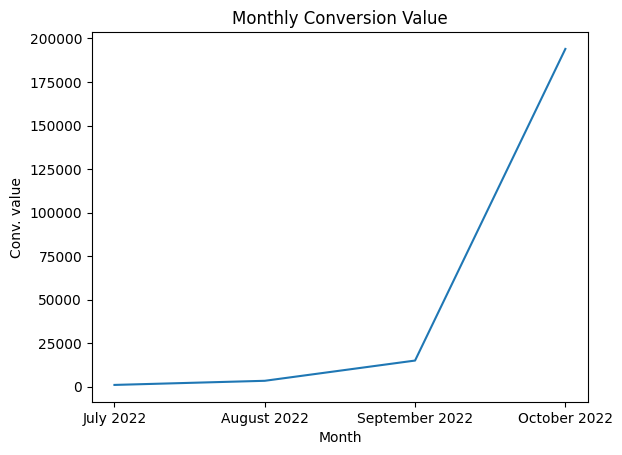

In [58]:
# I createt a dictionary to specify the desired order of months for the graph
month_order = {"July 2022": 1, "August 2022": 2, "September 2022": 3, "October 2022": 4}

# Then, converted the Month column to categorical data type with the specified order
new_df["Month"] = pd.Categorical(new_df["Month"], categories=month_order.keys(), ordered=True)

# And finally, sorted the new_df by the Month column
new_df = new_df.sort_values("Month")

# Plot the graph
plt.plot(new_df["Month"], new_df["Conv. value"])
plt.xlabel("Month")
plt.ylabel("Conv. value")
plt.title("Monthly Conversion Value")
plt.show()

In [59]:
# For the final month, the revenue increased by 1293%. Which was a huge success for the Marketing campaign and a new sales record for the event

# Thanks for reading my project!